In [37]:
import numpy as np
from matplotlib import pyplot as plt

In [62]:
fname = './ekf.csv'
samples = []

data = open(fname, "r")

for line in data:
   samples.append(line.split(','))



x_state = data[:,0].astype(float).tolist()
y_state = data[:,1].astype(float).tolist()
rmse_x = data[:,2].astype(float).tolist() 
rmse_y = data[:,3].astype(float).tolist()
rmse_vx = data[:,4].astype(float).tolist()
rmse_vy = data[:,5].astype(float).tolist()

TypeError: '_io.TextIOWrapper' object is not subscriptable

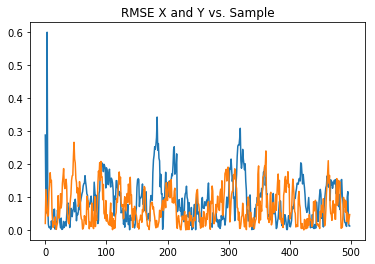

RMSE-X: 0.08898804064529056 RMSE-Y:  0.07032315474168337


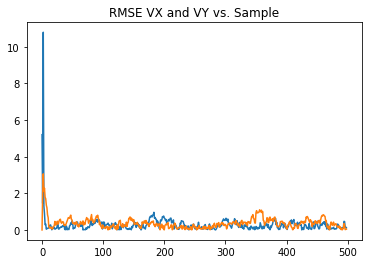

RMSE-VX:  0.2813214096617234 RMSE-VY 0.3618934740320641


In [63]:
plt.plot(rmse_x)

plt.plot(rmse_y)
plt.title("RMSE X and Y vs. Sample")
plt.show()
print("RMSE-X:", np.mean(rmse_x), "RMSE-Y: ", np.mean(rmse_y))

plt.plot(rmse_vx)
plt.plot(rmse_vy)
plt.title("RMSE VX and VY vs. Sample")
plt.show()

print("RMSE-VX: ", np.mean(rmse_vx), "RMSE-VY", np.mean(rmse_vy))

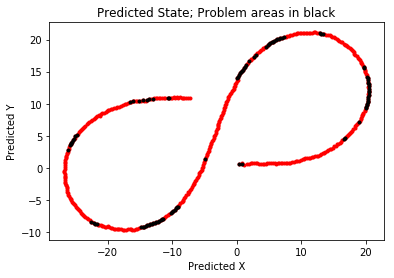

In [93]:
##find the worst offenders with large x errors
upper = rmse_x > np.percentile(rmse_x,80)
#print(upper)
offenders = [indx for indx,x in enumerate(upper) if x == True]

x_ = np.array(x_state)
y_ = np.array(y_state)
x_offenders = x_[offenders]
y_offenders = y_[offenders]



plt.plot(x_state, y_state, 'r.')
plt.plot(x_offenders, y_offenders, 'k.')
#plt.plot(x_state[300:350], y_state[300:350], 'k.')
plt.xlabel("Predicted X")
plt.ylabel("Predicted Y")
plt.title("Predicted State; Problem areas in black")
plt.show()

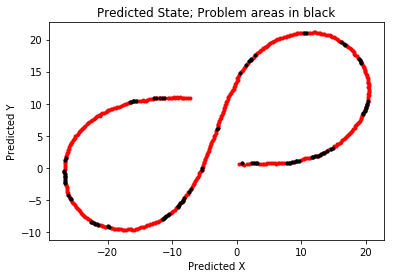

In [94]:
##find the worst offenders with large x errors
upper = rmse_y > np.percentile(rmse_y,80)
#print(upper)
offenders = [indx for indx,y in enumerate(upper) if y == True]

x_offenders = x_[offenders]
y_offenders = y_[offenders]



plt.plot(x_state, y_state, 'r.')
plt.plot(x_offenders, y_offenders, 'k.')
#plt.plot(x_state[300:350], y_state[300:350], 'k.')
plt.xlabel("Predicted X")
plt.ylabel("Predicted Y")
plt.title("Predicted State; Problem areas in black")
plt.show()